In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.data_structure import IntervalData
from interClusLib.similarity_distance import IntervalMetrics
from interClusLib.visualization.Dendrogram import Dendrogram
from interClusLib.evaluation import Evaluation
from interClusLib.clustering.IntervalAgglomerativeClustering import IntervalAgglomerativeClustering
from interClusLib.clustering.IntervalSOM import IntervalSOM
from interClusLib.clustering.IntervalFuzzyCMeans import IntervalFuzzyCMeans

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         18.812148        20.831238        28.568784        79.209608   
1         57.218863        74.687988        39.171644        78.082432   
2         55.520642        69.423080        27.872745        71.518080   
3         39.886261        58.631643        19.921208        79.201381   
4          4.729830        82.586898        31.567878        79.741130   
5         39.512726        65.024104        44.977780        79.057713   
6         18.384512        26.394227        13.508409        42.769629   
7         80.922300        85.294004        62.487164        67.049438   
8         41.662883        49.419360        38.312424        44.363980   
9         17.246595        90.178477        48.824014        59.208183   
10        62.517356        65.823419        20.412834        98.562

In [2]:
model = IntervalAgglomerativeClustering(n_clusters=4, linkage='complete')

model.fit(random_data.get_intervals())

print(model.get_labels())

print(Evaluation.silhouette_score(random_data.get_intervals(),model.get_labels(),metric='euclidean'))

[0 3 2 3 0 3 0 2 0 0 2 2 0 0 0 0 2 0 2 1 0 2 1 0 0 3 1 3 3 2]
0.1788051881500153


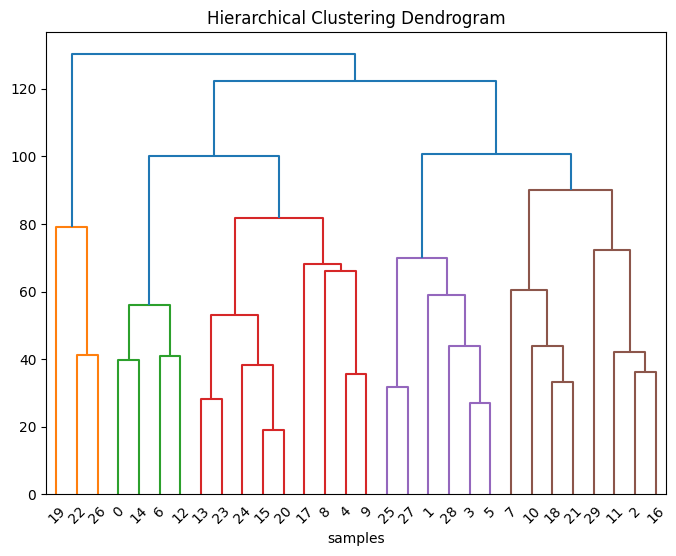

In [4]:
plt.figure(figsize=(8, 6))
Dendrogram.plot_dendrogram(model.model_)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plt.xlabel("samples")
plt.show()

In [ ]:
model = IntervalFuzzyCMeans(n_clusters=4, max_iter=200,adaptive_weights=True)

model.fit(random_data.get_intervals())

model.get_membership()

array([[0.35507946, 0.21618101, 0.23847156, 0.19026797],
       [0.13505491, 0.44504387, 0.31378992, 0.1061113 ],
       [0.44240839, 0.07251648, 0.13764579, 0.34742934],
       [0.22249311, 0.48780439, 0.06085121, 0.2288513 ],
       [0.45144243, 0.1724928 , 0.17051329, 0.20555148],
       [0.05708551, 0.83671666, 0.06451306, 0.04168477],
       [0.39391433, 0.10360039, 0.08803988, 0.41444539],
       [0.82322765, 0.04029785, 0.0669226 , 0.0695519 ],
       [0.19914823, 0.10213462, 0.07996833, 0.61874882],
       [0.16119685, 0.61975085, 0.09606139, 0.12299092],
       [0.1952315 , 0.09428826, 0.06276562, 0.64771462],
       [0.45049366, 0.18105151, 0.09461955, 0.27383528],
       [0.16055045, 0.08980773, 0.69359944, 0.05604238],
       [0.13051702, 0.1307939 , 0.67545865, 0.06323042],
       [0.17620859, 0.49352232, 0.22487172, 0.10539736],
       [0.31692408, 0.34777396, 0.17775406, 0.15754789],
       [0.21057713, 0.38573548, 0.07762401, 0.32606338],
       [0.17714175, 0.12897046,

In [ ]:
model.get_crisp_assignments()

print(Evaluation.silhouette_score(random_data.get_intervals(),model.get_crisp_assignments(),metric='euclidean'))

0.1739701156587431


In [ ]:
n_dims = random_data.get_intervals().shape[1]

som = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som.pca_weights_init(random_data.get_intervals())

In [ ]:
som.train_incremental(random_data.get_intervals(), verbose= False)

assignments = som.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)


Neuron (0, 0) has these sample indices => [0, 1, 5, 14, 18, 22, 23]
Neuron (1, 1) has these sample indices => [2, 4, 6, 7, 8, 11, 20, 25, 27]
Neuron (1, 0) has these sample indices => [3, 9, 10, 16, 19, 26, 29]
Neuron (0, 1) has these sample indices => [12, 13, 15, 17, 21, 24, 28]


In [ ]:
som_2 = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som_2.pca_weights_init(random_data.get_intervals())

In [ ]:
som_2.train_batch(random_data.get_intervals(), verbose= False)

assignments = som_2.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)

Neuron (0, 1) has these sample indices => [0, 12, 13, 17, 21]
Neuron (1, 1) has these sample indices => [1, 5, 14, 15, 18, 22, 23]
Neuron (0, 0) has these sample indices => [2, 4, 6, 7, 8, 10, 20, 24, 25, 27, 28]
Neuron (1, 0) has these sample indices => [3, 9, 11, 16, 19, 26, 29]
